In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()
import io

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
pd.pandas.set_option('display.max_columns',None)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Exited'].value_counts() #imbalanced data

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df.isnull().sum() # No nulls

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exited Vs CreditScore

In [55]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

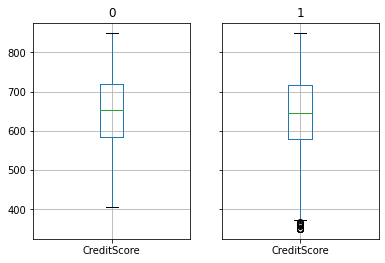

In [57]:
df.groupby('Exited').boxplot(column='CreditScore')

### Exited Vs Balance

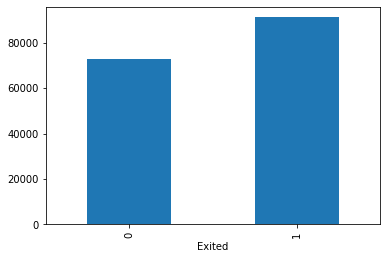

In [58]:
df.groupby('Exited')['Balance'].mean().plot.bar()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

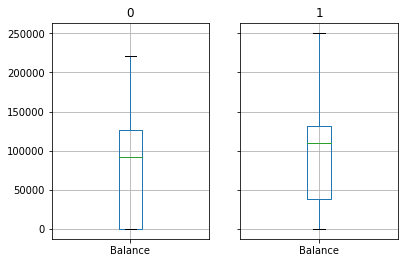

In [59]:
df.groupby('Exited').boxplot(column='Balance')

### Exited Vs Age

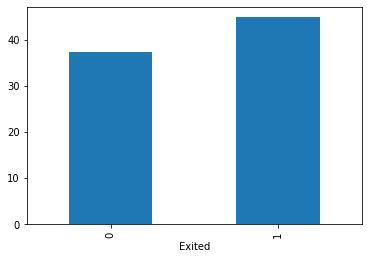

In [60]:
df.groupby('Exited')['Age'].mean().plot.bar()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

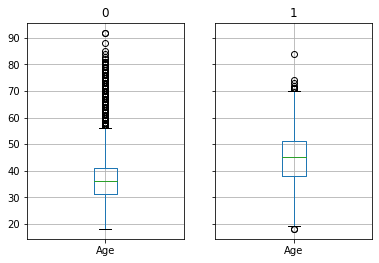

In [61]:
df.groupby('Exited').boxplot(column='Age')

In [13]:
#Splitting Data
X=df.iloc[:,3:13]
y=df.iloc[:,13]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
# Convert categorical variabless geography and gender to dummy variables
geography=pd.get_dummies(df['Geography'], drop_first=True)
gender=pd.get_dummies(df['Gender'], drop_first=True)

In [17]:
# Concat these 2 to df
X=pd.concat([X,geography, gender], axis=1)

In [19]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [21]:
# Creating Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LeakyReLU, ELU, PReLU

In [25]:
classifier=Sequential()

In [29]:
#Build a model
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Optimizing the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model_hist= classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 16s 2ms/step - loss: 0.9158 - accuracy: 0.4122 - val_loss: 0.5103 - val_accuracy: 0.7970
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7988 - val_loss: 0.4564 - val_accuracy: 0.8039
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.8043 - val_loss: 0.4429 - val_accuracy: 0.8050
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8046 - val_loss: 0.4349 - val_accuracy: 0.8058
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8173 - val_loss: 0.4267 - val_accuracy: 0.8061
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8313 - val_loss: 0.4161 - val_accuracy: 0.8167
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8295 - val_loss: 0.4067 - val_accuracy: 0.822

In [39]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [41]:
cm

array([[1520,   75],
       [ 200,  205]])

In [42]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, y_test)

In [43]:
score

0.8625

In [ ]:
# test accuracy and train accuracy is almost similar

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


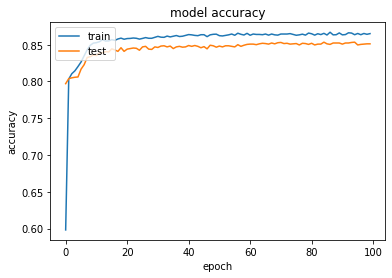

In [50]:
print(model_hist.history.keys())
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

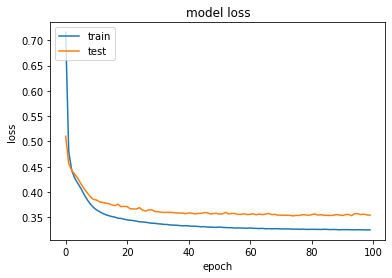

In [47]:
#Loss function
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()